# Notebook 5 Forma de los Datos

## Introducción a Mapper

¿Qué pasa si queremos dar información de nuestra base de datos si tenemos con una cantidad descomunal de datos? ¿Cómo podemos inferir información de la forma que tiene si los algoritmos anteriormente vistos son muy costosos computacionalmente?

Anteriormente, vimos que el Single Linkage clustering algorithm proporcionaba información del número de componentes conexas que persisten en la base de datos. Sin embargo, este algoritmo se basa en la geometría (distancia) de los puntos. ¿Cómo podemos generalizar esta idea y recuperar un poco de la información de la base de datos?

De la homología persistente, vimos que asignar un nervio a una cubierta era una buena manera de inferir información de la base de datos. Sin embargo, seguimos dependiendo de la información de las distancias entre los puntos. 

Si queremos generalizar esta idea, necesitamos generalizar nuestro tipo de cubiertas admisibles para analizar nuestra base de datos. 

El algoritmo de Mapper ayuda a agrupar nuestros datos usando una proyección de los datos en un espacio de menor dimensión.

In [1]:
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tadasets

Sea $X\subset \mathbb{R}^2$ un conjunto de datos y $f:X\to \mathbb{R}$ una función continua. De nuestros axiomas de TDA, sabemos que nuestro $X$ es una muestra de algún conjunto compacto $K\subset \mathbb{R}^2$ y por lo tanto $f(K)$ es un compacto de $\mathbb{R}$. Tomemos una cubierta finita de intervalos $U=\{U_i\}_{i=1}^n$ de $f(K)$ tal que $f(K)\subset \cup_{i=1}^n U_i$. Como $f$ es continua, pues $f^{-1}(U_i)$ es abierto en $X$ para todo $i$. Tomemos $V_j^i$ como las componentes conexas de $f^{-1}(U_i)$. Entonces, $\{V_j^i\}$ es una cubierta de $X$ y podemos tomar el nervio de esta cubierta. A este nervio lo llamamos el Mapper de $X$ con respecto a $f$ y $U$.

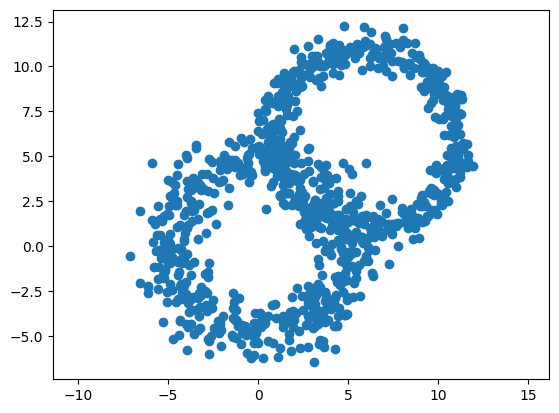

In [2]:
np.random.seed(9)
x1 = tadasets.dsphere(n=500, d=1, r=5, noise=0.9)
x2 = tadasets.dsphere(n=500, d=1, r=5, noise=0.5)
x2=[x+[6,6] for x in x2]
x = np.concatenate([x1, x2])
plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
plt.show()

Tomemos la proyección en la segunda coordenada (altura) y vemos que su imagén está contenida en el intervalo $[-7,13].$

In [3]:
fx=[x[:,1]]
(np.min(fx),np.max(fx))

(-6.458550574035664, 12.224939636045212)

Tomemos una cubierta de intervalos de $[-7,13],$ digamos por ejemplo $U=\{[-7,-3.5],[-4.5,-0.5],[-1.5,3.5],[2.5,6.5],[5.5,9.5],[8.5,13]\}.$

In [4]:
u1=[-7,-3.5]
u2= [-4.5,-0.5]
u3=[-1.5,3.5]
u4=[2.5,6.5]
u5=[5.5,9.5]
u6=[8.5,13]

import pandas as pd

df = pd.DataFrame(x, columns=["x", "y"])


def classifier(x):
    if x[1]<u1[1]:
        return 1
    if x[1]<u2[1]:
        return 2
    if x[1]<u3[1]:
        return 3
    if x[1]<u4[1]:
        return 4
    if x[1]<u5[1]:
        return 5
    return 6

In [5]:
df["c"] = df.apply(classifier, axis=1)

/var/folders/jb/fw_xqctx06scr5xsh30_k86h0000gn/T/ipykernel_49515/1485257016.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1]<u1[1]:
/var/folders/jb/fw_xqctx06scr5xsh30_k86h0000gn/T/ipykernel_49515/1485257016.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1]<u2[1]:
/var/folders/jb/fw_xqctx06scr5xsh30_k86h0000gn/T/ipykernel_49515/1485257016.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1]<u3[1]:
/var

In [51]:
df.index = range(len(df))

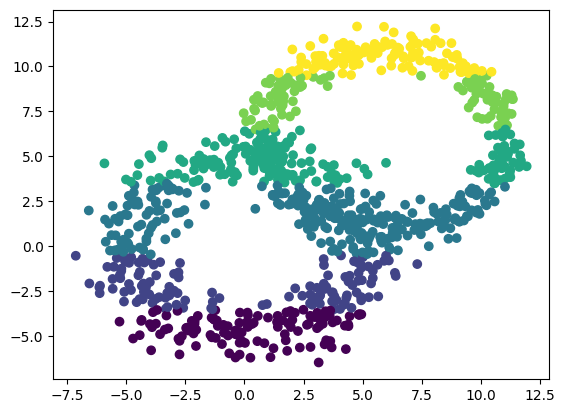

In [7]:
plt.scatter(df["x"], df["y"], c=df["c"])

### Preguntas claves:

1. ¿Cuáles son los parámetros del Mapper?
2. ¿Cómo creen que afecten si cambiamos la cubierta $U$? Intenta $U_1=\{[-7,-3.5],[-3,-0.5],[-1,3.5],[2,6.5],[5,9.5],[8,13]\}$ y $U_2=\{[-7,-2.2],[-2,3.2],[3,8.2],[8,13]\}.$
3. ¿Cómo creen que afecten si cambiamos la función $f$? Intenta con la función $f:X\to \mathbb{R}$ dada por $f(x,y)=x+y$ y $f:X\to \mathbb{R}$ dada por $f(x,y)=x^2+y^2.$


## `KMapper`Package

El paquete `KMapper` nos permite hacer el Mapper de una base de datos usando los paramétros adecuados, es parte de la paquetería `giotto-tda` que es una paquetería de TDA en Python, puedes revisar la documentación [aquí](https://giotto-ai.github.io/gtda-docs/0.4.0/). Para instalarlo, usamos el comando `pip install kmapper`.

In [8]:
mapper = km.KeplerMapper(verbose=1)
# La proyección sobre el math score, corresponde a proyectar sobre la primera columna de data
projected_data = mapper.fit_transform(x, projection=[1]
                                      ) # Math score


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 2)

..Projecting data using: [1]

..Scaling with: MinMaxScaler()



In [17]:
covering=km.Cover(n_cubes=7,perc_overlap=0.2)
covering

Cover(n_cubes=7, perc_overlap=0.2, limits=None, verbose=0)

In [33]:
G = mapper.map(projected_data, x, clusterer=sklearn.cluster.KMeans(n_clusters=2),cover=covering)

Mapping on data shaped (1000, 2) using lens shaped (1000, 1)

Creating 7 hypercubes.

Created 15 edges and 14 nodes in 0:00:00.101929.


In [19]:
G['meta_data']

{'projection': '[1]',
 'n_cubes': 7,
 'perc_overlap': 0.2,
 'clusterer': 'KMeans(n_clusters=2)',
 'scaler': 'MinMaxScaler()'}

In [20]:
mapper.visualize(G, 
                title='Example 1 of Mapper on the Sphere dataset',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = x[:,1],
                color_function_name = 'Height of the point',
                node_color_function=np.array(['average','std','sum','max','min']))


Wrote visualization to: mapper_visualization_output.html


/Users/alejandroucan/Library/Python/3.9/lib/python/site-packages/kmapper/visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
/Users/alejandroucan/Library/Python/3.9/lib/python/site-packages/kmapper/visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Performance Data based on Math Score and Mean of other two | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;

## Cambiemos nuestra proyección

La función `mapper.fit_transform`nos permite modificar la función de proyección de los datos. Podemos escoger varios: 

1. Proyección en ciertas coordenadas.
2. Funciónes especiales: “sum”, “mean”, “median”, “max”, “min”, “std”, “dist_mean”, “l2norm”, “knn_distance_n”
3. Otros arrays obtenidos de la base de datos.

También podemos escalar los datos con el parámetro `scaler` y modificar la distancia con el parámetro `distance_matrix`.


In [24]:
projected_data2 = mapper.fit_transform(x, projection='sum'
                                      , scaler=None, distance_matrix='cosine') # Math score

..Composing projection pipeline of length 1:
	Projections: sum
	Distance matrices: cosine
	Scalers: None
..Projecting on data shaped (1000, 2)
Created distance matrix, shape: (1000, 1000), with distance metric `cosine`

..Projecting data using: sum


In [32]:
G2 = mapper.map(projected_data2, x, clusterer=sklearn.cluster.KMeans(n_clusters=2),cover=covering)
mapper.visualize(G, 
                title='Example 2 of Mapper on the Sphere dataset',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = x[:,1]+x[:,0],
                color_function_name = 'Sum',
                node_color_function=np.array(['average','std','sum','max','min']))

Mapping on data shaped (1000, 2) using lens shaped (1000, 1)

Creating 7 hypercubes.

Created 12 edges and 14 nodes in 0:00:00.026832.
Wrote visualization to: mapper_visualization_output.html


/Users/alejandroucan/Library/Python/3.9/lib/python/site-packages/kmapper/visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
/Users/alejandroucan/Library/Python/3.9/lib/python/site-packages/kmapper/visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Example 2 of Mapper on the Sphere dataset | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  fo

## Information about the Vertices

El mapper es simplemente una representación gráfica de como se relacionan nuestros datos basados en la función proyección, sin embargo es nuestro deber obtener información estadistica de los clusters.

El output de `mapper.map` nos da una lista de información con el metadata y los clusters de obtenidos. Con la opción `output['nodes']['nombre del cluster']` podemos obtener la información de cada cluster.

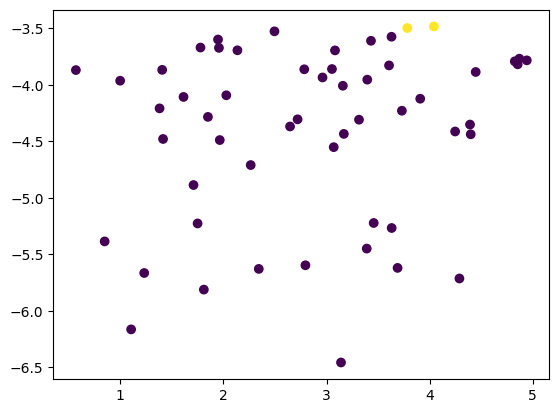

In [55]:
cube0cluster0=df.loc[G['nodes']['cube0_cluster0']]
plt.scatter(cube0cluster0["x"], cube0cluster0["y"], c=cube0cluster0["c"])


## Optimización de Hiperparámetros.

El Mapper tiene varios hiperparámetros que podemos optimizar. Algunos de ellos son:
1. `n_intervals`: número de intervalos en la proyección.
2. `n_neighbors`: número de vecinos en la proyección.
3. `clusterer`: el tipo de cluster que queremos usar. Por defecto es `DBSCAN` pero podemos usar `KMeans`, `AgglomerativeClustering`, `MeanShift`, etc.
4. `clusterer_params`: parámetros del clusterer que queremos usar. Por defecto es `{'eps': 0.5, 'min_samples': 5}`.
5. `n_jobs`: número de trabajos en paralelo que queremos usar. Por defecto es `1`. Si tenemos un computador con varios núcleos, podemos usar `-1` para usar todos los núcleos.
6. `lens`: el tipo de proyección que queremos usar. Por defecto es `['euclidean']` pero	 podemos usar `['manhattan']`, `['cosine']`, `['hamming']`, `['jaccard']`, `['chebyshev']`, `['mahalanobis']`, `['correlation']`, `['braycurtis']`, `['canberra']`, `['cityblock']`, `['sqeuclidean']`, `['minkowski']` o cualquier otra proyección que queramos usar.

Por mencionar algunos, debido a la cantidad de parámetros que podemos usar y la sensibilidad del resultado ante la modificación de estos parámetros, tenemos que escoger de manera eficiente. 

Algunas recomendaciones son:

### Proyecciones:

1. Si los datos tienen relaciones lineales, entonces es recomdable usar `PCA`.
```python
projection = mapper.fit_transform(X, projection="sum")  # 1D PCA
```
2. Si los datos tienen relaciones no lineales, entonces es recomendable usar `UMAP` o `t-SNE` dependiendo de las caracteristicas que queremos observar (Locales: `t-SNE` y Globales: `UMAP`).
```python
projection = mapper.fit_transform(X, projection="umap")  # UMAP
projection = mapper.fit_transform(X, projection="tsne")  # t-SNE
```

3. Específicos: construir funciones de proyección específicas para los datos, por ejemplo: densidad, promedio de un valor específico, etc.

**TIP:** Visualiza la distribución de la función de proyección para verificar si hay divisiones significativas.


###  La cubierta de intervalos: (n_cubes, perc_overlap)

* `n_cubes`: número de intervalos que queremos usar, tomar entre 5 y 15 es un buen comienzo. Si son muy pocos, no obtendremos información suficiente y si son muchos, obtendremos ruido.
* `perc_overlap`: porcentaje de superposición entre los intervalos. Empezar con 30% es un buen comienzo. Incrementalo si quieres unir más cluster o disminuirlo si quieres separarlos más. 

**Validación:** Checa si los nodos se alinean con el cluster natural. Si no, entonces es recomendable cambiar la proyección o la cubierta de intervalos.


### Clusterer:

1. `DBSCAN`: clusterer por defecto, es bueno para datos con ruido y no requiere que especifiques el número de clusters. Sin embargo, es sensible a la distancia y puede ser lento para grandes cantidades de datos.
    * `eps`: distancia máxima entre dos puntos para que sean considerados parte del mismo cluster. Si es muy pequeño, obtendrás muchos clusters y si es muy grande, obtendrás pocos clusters.
    * `min_samples`: número mínimo de puntos para que un cluster sea considerado un cluster. Si es muy pequeño, obtendrás muchos clusters y si es muy grande, obtendrás pocos clusters. Se recomienda empezar con 3-5.


2. `KMeans`: clusterer rápido y eficiente, pero requiere que especifiques el número de clusters y es sensible al ruido. Es bueno para datos con formas esféricas y no es sensible a la distancia.
    * `n_clusters`: número de clusters que quieres obtener. Es recomendable usar el método del codo o score silhouette para determinar el número óptimo de clusters.



### Validación del Mapper

1. **Checa la relación nodo-color:** los nodos deben contener labels similares o deben estar relacionados entre sí (mediante la función proyección). Si no, entonces es recomendable cambiar la proyección o la cubierta de intervalos. 

2. **Ajusta para Sobre/sub clustering:** si los nodos tienen pocos puntos, entonces reduce el `n_cubes` o incrementa `eps`. Si cuentas con muy pocos nodos, entonces aumenta el `n_cubes` o reduce `eps`. Si tienes muchos nodos, entonces reduce el `perc_overlap` o `min_samples`.

## Practica:

Usando el dataset `iris` de sklearn, intenta hacer el Mapper usando los siguientes parámetros:
1. Proyección en UMAP con `n_components=2`.
2. Cubierta de intervalos con `n_cubes=10` y `perc_overlap=0.3`.
3. Clusterer `DBSCAN` con `eps=0.4` y `min_samples=3`.


Recomendación: juega con los hiperparametos datos para ver como se modifica el grafo y los elementos de los nodos.